### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import src.cleaning as cle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neural_network import MLPRegressor

### Load datasets

In [2]:
train = pd.read_csv("./data/train.csv")

In [3]:
test = pd.read_csv("./data/test.csv")

### Explore and clean the data

In [4]:
train

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,8.754
1,1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,7.492
2,2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,9.010
3,3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,6.227
4,4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,8.314
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,Ideal,E,VS2,62.5,55.0,5.08,5.13,3.19,7.412
40451,40451,0.80,Ideal,H,VS2,62.1,54.0,5.96,5.99,3.71,8.016
40452,40452,1.53,Premium,G,SI2,58.7,59.0,7.51,7.45,4.39,9.070
40453,40453,1.51,Ideal,I,VS2,61.6,54.0,7.38,7.42,4.57,9.199


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [6]:
train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
# Check the values in the cut column. In the function I give them a value depending on their importance
train['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [8]:
# Check the values in the color column. Same with color
train['color'].unique()

array(['G', 'H', 'J', 'F', 'E', 'I', 'D'], dtype=object)

In [9]:
# Check the values in the clarity column.
# The clarity is classified in five groups with a total of 
train['clarity'].unique()

array(['VS1', 'VS2', 'SI2', 'IF', 'SI1', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [10]:
train.corr()

,id,carat,depth,table,x,y,z,price
id,1.000000,0.005008,-0.005396,0.002846,0.007422,0.007702,0.005633,0.007602
carat,0.005008,1.000000,0.029747,0.182453,0.974714,0.944353,0.948460,0.920292
depth,-0.005396,0.029747,1.000000,-0.291668,-0.023705,-0.028183,0.095489,0.003437
table,0.002846,0.182453,-0.291668,1.000000,0.197420,0.184191,0.152496,0.159969
x,0.007422,0.974714,-0.023705,0.197420,1.000000,0.967309,0.966396,0.957815
y,0.007702,0.944353,-0.028183,0.184191,0.967309,1.000000,0.941970,0.928896
z,0.005633,0.948460,0.095489,0.152496,0.966396,0.941970,1.000000,0.930774
price,0.007602,0.920292,0.003437,0.159969,0.957815,0.928896,0.930774,1.000000


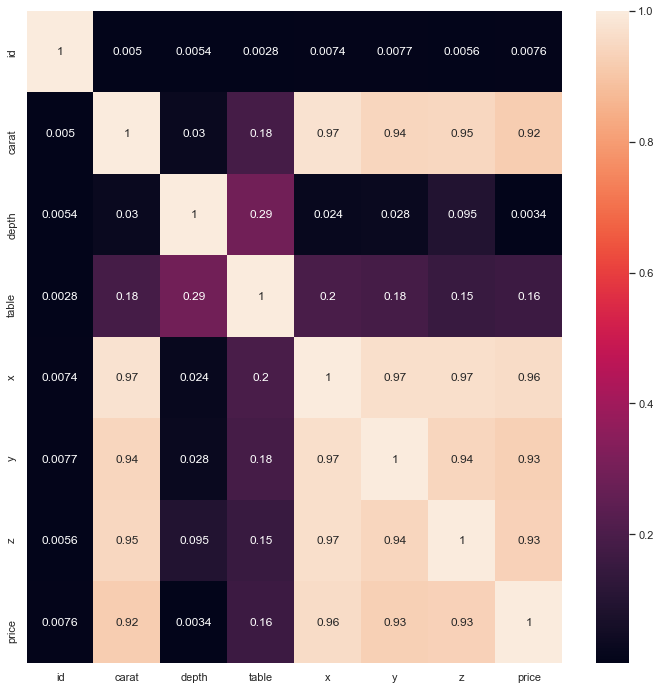

In [11]:
sns.set(rc={'figure.figsize': (12, 12)})
sns_plot = sns.heatmap(train.corr().abs(), annot=True);

In [12]:
sns_plot.figure.savefig("./images/correlation.svg")

I decided to delete the x, y, z columns, with give the size and are very correlated with the carat and the price. Table and depth also give the size of the diamond. 

I include all the cleaning in the following function.

### Cleaning the training dataset

In [13]:
df_train = train.copy()

In [14]:
cle.clean_dataset(df_train)

,carat,depth,table,price,cut_n,color_n,clarity_n
0,1.01,62.7,58.0,8.754,4,4,3.5
1,0.60,64.3,57.0,7.492,2,4,3.0
2,1.60,59.4,59.0,9.010,4,5,2.0
3,0.30,63.5,58.0,6.227,3,7,3.5
4,1.00,62.8,57.0,8.314,3,3,2.0
...,...,...,...,...,...,...,...
40450,0.51,62.5,55.0,7.412,5,2,3.0
40451,0.80,62.1,54.0,8.016,5,5,3.0
40452,1.53,58.7,59.0,9.070,4,4,2.0
40453,1.51,61.6,54.0,9.199,5,6,3.0


In [15]:
df_train.to_csv("./data/train_clean.csv")

### Cleaning the test dataset

In [16]:
df_test = test.copy()

In [17]:
cle.clean_dataset(df_test)

,carat,depth,table,cut_n,color_n,clarity_n
0,2.01,61.9,57.0,5,5,2.50
1,0.49,57.5,60.0,2,1,3.50
2,1.03,58.6,62.0,4,3,2.50
3,0.90,63.0,56.0,3,2,2.50
4,0.59,62.5,55.0,5,1,2.50
...,...,...,...,...,...,...
13480,0.41,63.8,57.0,2,3,1.66
13481,2.05,63.5,62.0,3,5,3.00
13482,2.22,60.5,59.0,4,6,3.00
13483,0.51,58.3,62.0,5,2,2.00


In [18]:
#Save the clean test data. 
df_test.to_csv("./data/test_clean.csv")

### Trial with a Linear regresssion to upload first prediction

In [19]:
X = df_train.drop(['price'], axis = 1)

In [20]:
y = df_train['price']

In [21]:
X.shape

(40455, 6)

In [22]:
y.shape

(40455,)

In [23]:
lr = LinearRegression()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = None)

In [25]:
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
y_train_predict = lr.predict(X_train)

In [27]:
y_test_predict = lr.predict(X_test)

In [28]:
print("The mean squared error of the training set is: ", mean_squared_error(y_true = y_train, y_pred = y_train_predict).round(4))

The mean squared error of the training set is:  0.1261


In [29]:
print("The mean squared error of the test set is: ", mean_squared_error(y_true = y_test, y_pred = y_test_predict).round(4))

The mean squared error of the test set is:  0.1177


In [30]:
y_predict = lr.predict(df_test)

In [31]:
df_test['price'] = y_predict

In [32]:
df_test.reset_index()

,index,carat,depth,table,cut_n,color_n,clarity_n,price
0,0,2.01,61.9,57.0,5,5,2.50,10.208014
1,1,0.49,57.5,60.0,2,1,3.50,7.403722
2,2,1.03,58.6,62.0,4,3,2.50,8.273782
3,3,0.90,63.0,56.0,3,2,2.50,8.020025
4,4,0.59,62.5,55.0,5,1,2.50,7.475201
...,...,...,...,...,...,...,...,...
13480,13480,0.41,63.8,57.0,2,3,1.66,6.708723
13481,13481,2.05,63.5,62.0,3,5,3.00,10.368067
13482,13482,2.22,60.5,59.0,4,6,3.00,10.654540
13483,13483,0.51,58.3,62.0,5,2,2.00,7.170240


In [33]:
df_model_1 = df_test.drop(['carat', 'depth', 'table', 'cut_n', 'color_n', 'clarity_n'], axis = 1)

In [34]:
df_model_1.reset_index(inplace = True)

In [35]:
df_model_1.rename(columns = {'index': 'id'}, inplace = True)

In [36]:
df_model_1.to_csv("./data/predictions/first_model.csv", index = False)

### Creating models for predictions

In [37]:
models = { "ridge": Ridge(),
          "lasso": Lasso(),
          "sgd": SGDRegressor(),
          "knn": KNeighborsRegressor(),
          "gradient": GradientBoostingRegressor()
}

In [38]:
for name, model in models.items():
    print(f"Training model ---> {name}")
    model.fit(X_train,y_train)
    print(f"Done")

Training model ---> ridge
Done
Training model ---> lasso
Done
Training model ---> sgd
Done
Training model ---> knn
Done
Training model ---> gradient
Done


In [39]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--------{name}--------")
    print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
    print("\n")

--------ridge--------
MSE:  0.11771132884837944


--------lasso--------
MSE:  1.0232664341303161


--------sgd--------
MSE:  4183049593483752.0


--------knn--------
MSE:  0.16894202627610927


--------gradient--------
MSE:  0.012051632498296723




Gradient is the one with the lowest mean squared error, so I will use that one. 

### Gradient

In [40]:
parameters = {
    'max_depth': [20, 200], 
    'max_features': ['auto', 'sqrt'], 
    'min_samples_leaf': [1, 2, 8],
    'n_estimators' : [400, 600,800]
}

In [41]:
# This cell is commented out so if I restart the kernel it doesn't run again

#grid = GridSearchCV(models["gradient"], parameters, verbose = 1)
#grid.fit(X_train,y_train)

#print(grid.best_params_)

In [42]:
gradient = GradientBoostingRegressor(criterion='friedman_mse', learning_rate = 0.1, max_depth =  20, max_features =  'auto', min_samples_leaf =  8, n_estimators = 400)

In [43]:
# Do the training with the X and y from the train
gradient.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=20, max_features='auto', min_samples_leaf=8,
                          n_estimators=400)

In [44]:
y_train_pred = gradient.predict(X_test)

In [45]:
print("The mean squared error is: ", metrics.mean_squared_error(y_test,y_train_pred))

The mean squared error is:  0.01199512915328567


In [46]:
gradient.fit(X, y)

GradientBoostingRegressor(max_depth=20, max_features='auto', min_samples_leaf=8,
                          n_estimators=400)

In [47]:
df_model_2 = cle.prepare_prediction(df_test, gradient)

In [48]:
df_model_2.to_csv("./data/predictions/second_model.csv", index = False)

### Random forest

In [49]:
forest = RandomForestRegressor()

In [50]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
y_train_pred = forest.predict(X_test)

In [52]:
print("The mean squared error is: ", metrics.mean_squared_error(y_test, y_train_pred))

The mean squared error is:  0.01206268875764935


In [53]:
parameters = {
    'max_depth': [10, 200],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 8],
    'n_estimators': [200, 300, 400],
}

In [54]:
# This cell is commented out so if I restart the kernel it doesn't run again

#grid = GridSearchCV(forest, parameters, verbose=1, n_jobs= None)
#grid.fit(X_train,y_train)
#print(grid.best_params_)

In [55]:
forest = RandomForestRegressor(bootstrap = True, max_depth =  200, max_features =  'auto', min_samples_leaf =  8, n_estimators = 300)

In [56]:
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=200, min_samples_leaf=8, n_estimators=300)

In [57]:
y_train_pred = forest.predict(X_test)

In [58]:
print("The mean squared error is: ", metrics.mean_squared_error(y_test,y_train_pred))

The mean squared error is:  0.010831748645833694


In [59]:
df_model_3 = cle.prepare_prediction(df_test, forest)

In [60]:
df_model_3.to_csv("./data/predictions/third_model.csv", index = False)

### MLP Regressor

In [61]:
mlp = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

In [62]:
mlp.fit(X_train, y_train)

MLPRegressor(max_iter=500, random_state=1)

In [63]:
y_train_pred = mlp.predict(X_test)

In [64]:
print("The mean squared error is: ", metrics.mean_squared_error(y_test,y_train_pred))

The mean squared error is:  0.029032568625259905


In [65]:
df_model_4 = cle.prepare_prediction(df_test, mlp)

In [66]:
df_model_4.to_csv("./data/predictions/fourth_model.csv", index = False)